# **Covid Vaccination**

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error

import joblib

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pycaret[models] -q

In [ ]:
from pycaret.regression import *

## Load and Prepare Data

In [ ]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


## EDA

In [ ]:
df.isnull().sum()

,0
country,0
iso_code,0
date,0
total_vaccinations,13789
people_vaccinated,14686
people_fully_vaccinated,17445
daily_vaccinations_raw,16819
daily_vaccinations,292
total_vaccinations_per_hundred,13789
people_vaccinated_per_hundred,14686


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df.drop(['iso_code','source_name','source_website'], axis=1, inplace=True)

In [ ]:
df.country.nunique()

218

In [ ]:
## Different vaccine brands in the dataset
vaccine_names = set()
for i in range(len(df.country)):
  vaccine_names.update(df.vaccines[i].replace(' ','').split(','))
vaccine_names

{'Abdala',
 'CanSino',
 'Covaxin',
 'EpiVacCorona',
 'Johnson&Johnson',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'QazVac',
 'RBD-Dimer',
 'Sinopharm/Beijing',
 'Sinopharm/HayatVax',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Soberana02',
 'SputnikV'}

In [ ]:
## list of ountries, each vaccine is used.
vaccine_stat = dict()
for i in range(len(df.country)):
  lst = df.vaccines[i].replace(' ','').split(',')
  for j in lst:
    if j not in vaccine_stat:
      vaccine_stat[j] = [df.country[i]]
    elif df.country[i] not in vaccine_stat[j]:
      vaccine_stat[j].append(df.country[i])

In [ ]:
for i,j in vaccine_stat.items():
  print(i,' :\n')
  print(j)
  print('\n*********************')

Johnson&Johnson  :

['Afghanistan', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'France', 'Germany', 'Greece', 'Honduras', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Libya', 'Lithuania', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'South Africa', 'South Korea', 'Spain', 'United States']

*********************
Oxford/AstraZeneca  :

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chile', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Democra

In [ ]:
vaccine_num = dict()
countries_lst = [key for key in vaccine_stat.keys()]
numbers_lst = [len(value) for value in vaccine_stat.values()]

vaccine_stat_df = pd.DataFrame(list(zip(countries_lst, numbers_lst)),
                   columns=['Vaccines', 'Numbers']).sort_values(by='Numbers', ascending=False)
vaccine_stat_df

,Vaccines,Numbers
1,Oxford/AstraZeneca,180
2,Pfizer/BioNTech,107
3,Sinopharm/Beijing,61
6,Moderna,56
5,SputnikV,48
4,Sinovac,36
0,Johnson&Johnson,29
7,Covaxin,6
8,CanSino,4
9,Sinopharm/Wuhan,2


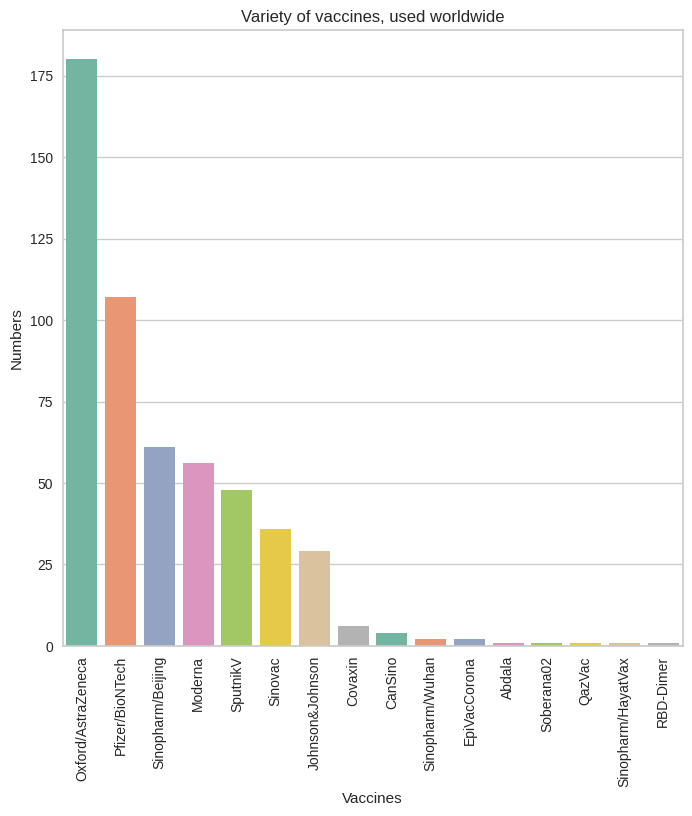

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Vaccines', y='Numbers',data=vaccine_stat_df, palette='Set2')
plt.title('Variety of vaccines, used worldwide')
plt.xticks(rotation=90)
plt.show()

In [ ]:
vaccines_top5 ={'China':0, 'India':0, 'United States':0,'Brazil':0,'Germany':0}
top5_list = ['China','India','United States','Brazil','Germany']
for i,j in vaccine_stat.items():
  for k in top5_list:
    if k in j:
      vaccines_top5[k]+=1
vaccines_top5

{'China': 4, 'India': 3, 'United States': 3, 'Brazil': 4, 'Germany': 4}

In [ ]:
country_daily_gb_sorted = df.groupby('country')['daily_vaccinations'].sum().reset_index().sort_values(by='daily_vaccinations', ascending=False, ignore_index=True)[:30]

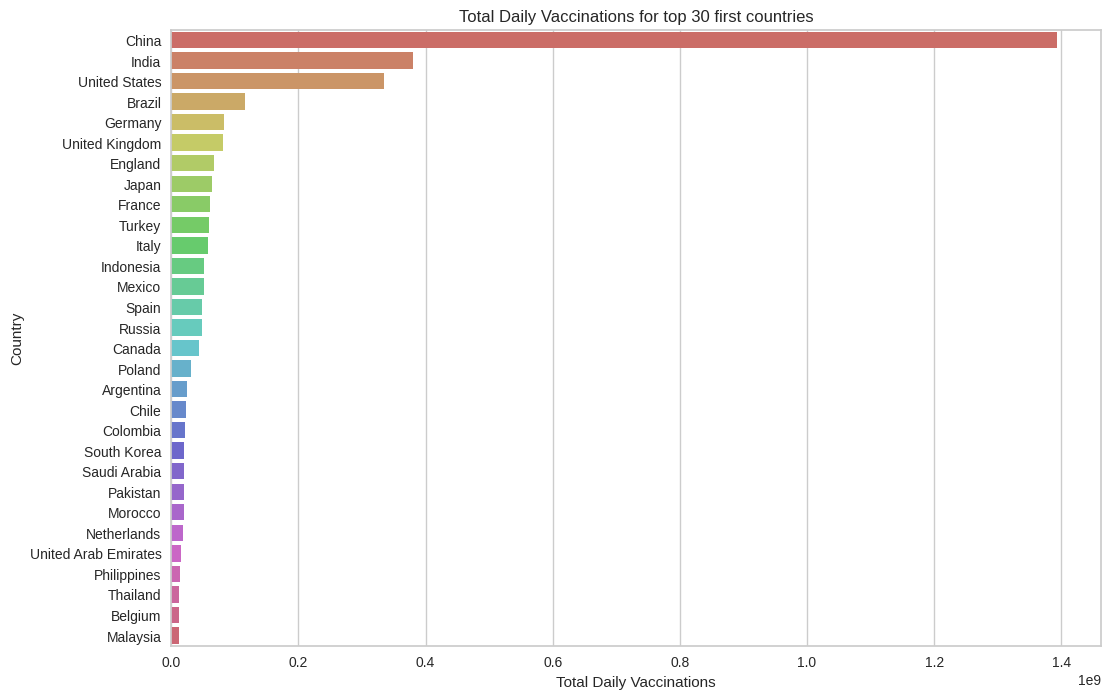

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='daily_vaccinations', y='country', data=country_daily_gb_sorted, palette='hls')
plt.xlabel('Total Daily Vaccinations')
plt.ylabel('Country')
plt.title('Total Daily Vaccinations for top 30 first countries')
plt.show()

In [ ]:
top5 = df[df.country.isin(['China', 'India', 'United States', 'Brazil', 'Germany'])].reset_index()

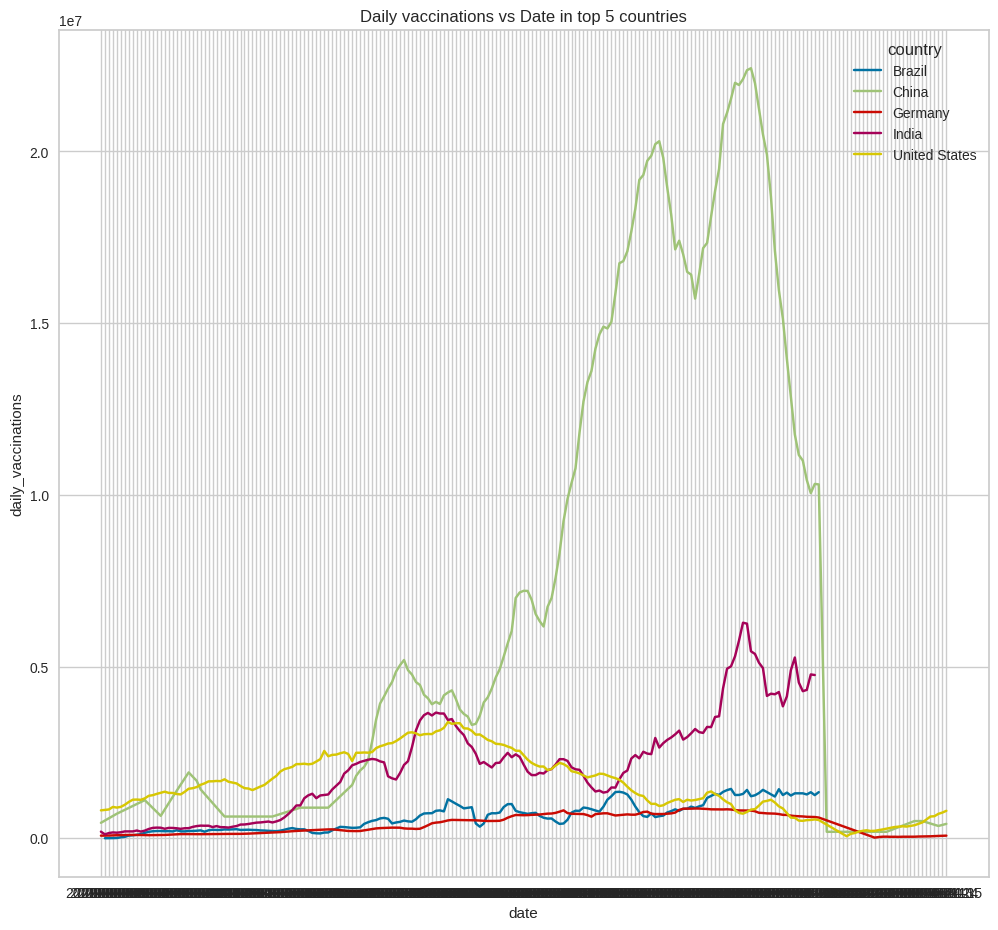

In [ ]:
plt.figure(figsize=(12,11))
sns.lineplot(data=top5, x='date', y='daily_vaccinations', hue='country')
plt.title('Daily vaccinations vs Date in top 5 countries')
plt.show()

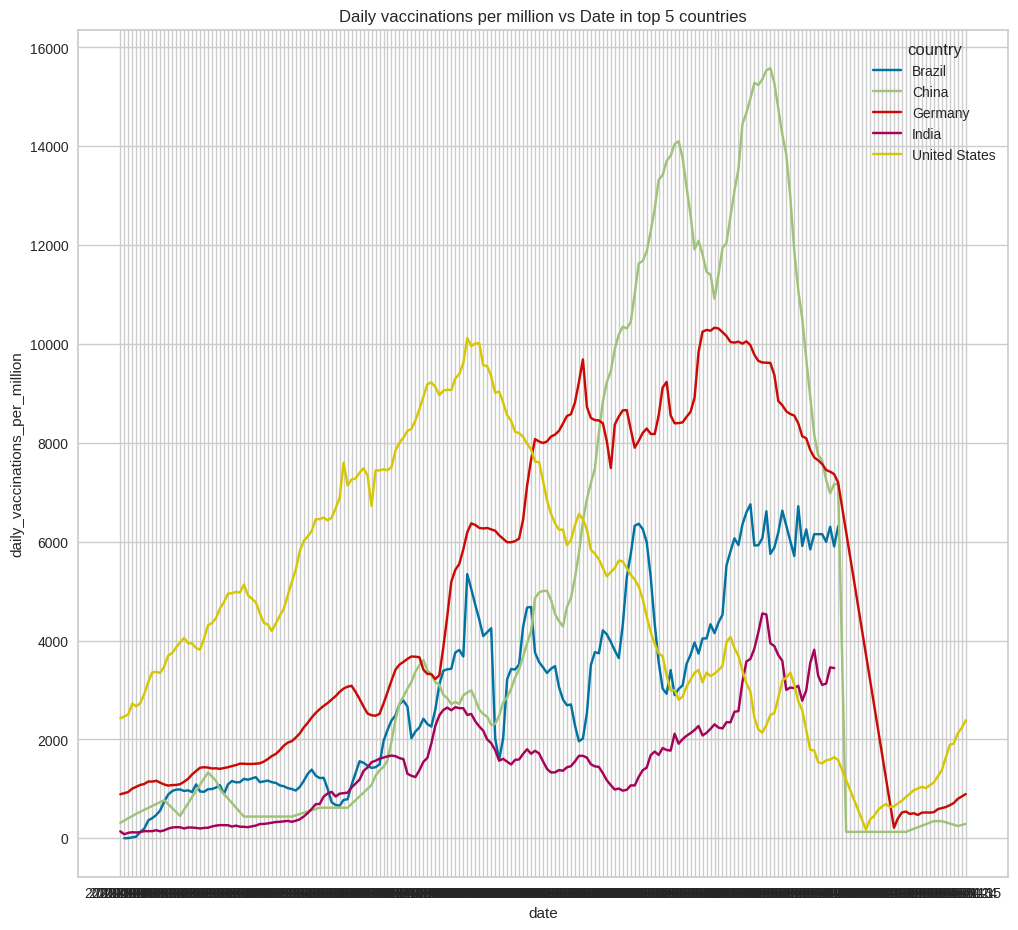

In [ ]:
plt.figure(figsize=(12,11))
sns.lineplot(data=top5, x='date', y='daily_vaccinations_per_million', hue='country')
plt.title('Daily vaccinations per million vs Date in top 5 countries')
plt.show()

In [ ]:
top5_vaccine_variety={'China':[], 'India':[], 'United States':[], 'Brazil':[], 'Germany':[]}

for i in range(len(top5.country)):
  lst = top5.vaccines[i].replace(' ','').split(',')
  for j in lst:
    if j not in top5_vaccine_variety[top5.country[i]]:
      top5_vaccine_variety[top5.country[i]].append(j)

In [ ]:
top5_vaccine_variety_length = [len(value) for value in top5_vaccine_variety.values()]
max_length = max(top5_vaccine_variety_length)
for value in top5_vaccine_variety.values():
  diff = max_length - len(value)
  if diff>0:
    for j in range(diff):
      value.append('-')

top5_vaccine_variety_df = pd.DataFrame(top5_vaccine_variety)
top5_vaccine_variety_df

,China,India,United States,Brazil,Germany
0,CanSino,Covaxin,Johnson&Johnson,Johnson&Johnson,Johnson&Johnson
1,Sinopharm/Beijing,Oxford/AstraZeneca,Moderna,Oxford/AstraZeneca,Moderna
2,Sinopharm/Wuhan,SputnikV,Pfizer/BioNTech,Pfizer/BioNTech,Oxford/AstraZeneca
3,Sinovac,-,-,Sinovac,Pfizer/BioNTech


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   date                                 31240 non-null  object 
 2   total_vaccinations                   17451 non-null  float64
 3   people_vaccinated                    16554 non-null  float64
 4   people_fully_vaccinated              13795 non-null  float64
 5   daily_vaccinations_raw               14421 non-null  float64
 6   daily_vaccinations                   30948 non-null  float64
 7   total_vaccinations_per_hundred       17451 non-null  float64
 8   people_vaccinated_per_hundred        16554 non-null  float64
 9   people_fully_vaccinated_per_hundred  13795 non-null  float64
 10  daily_vaccinations_per_million       30948 non-null  float64
 11  vaccines                    

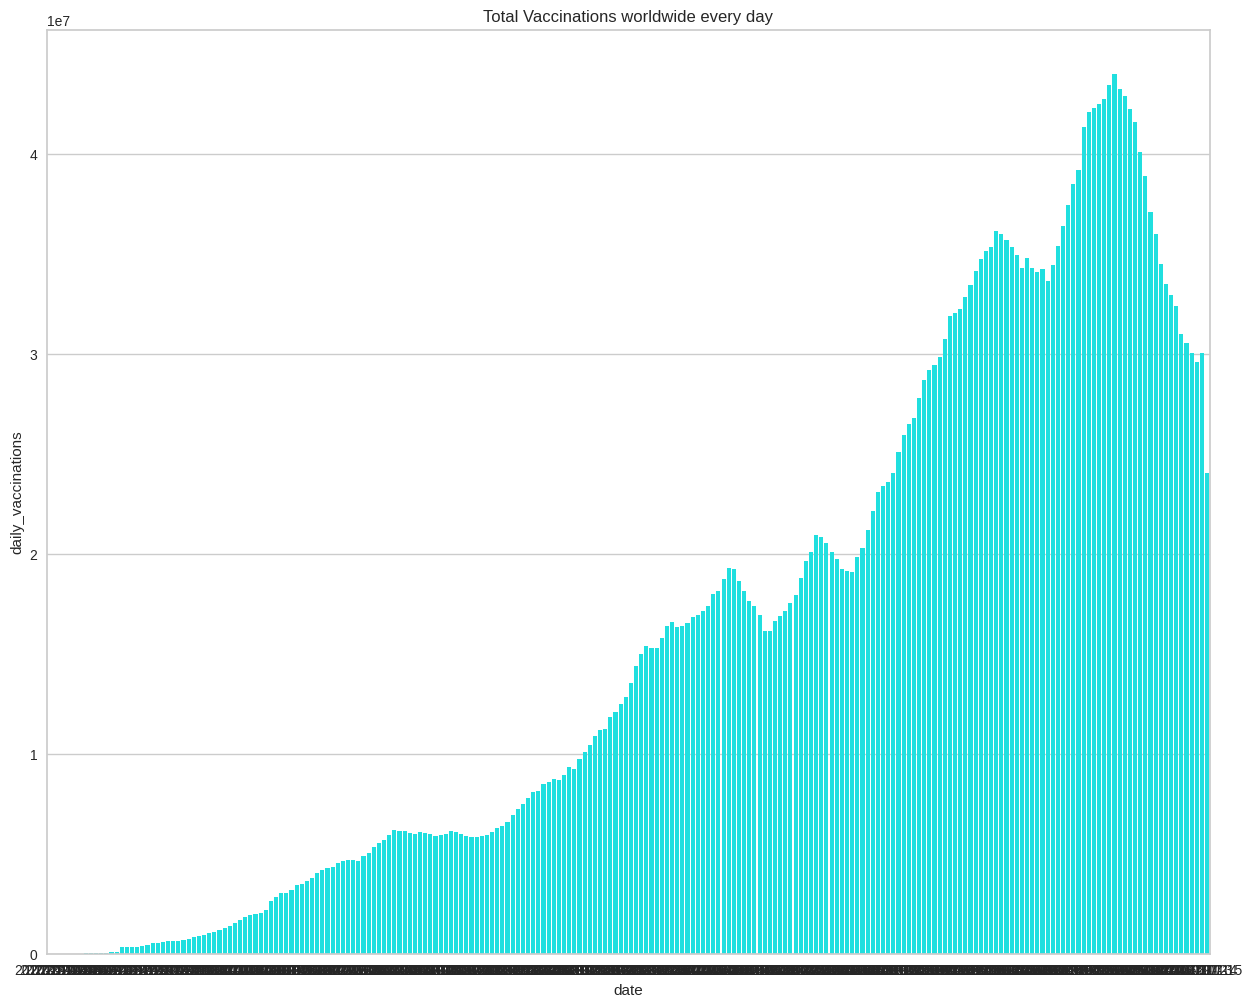

In [ ]:
daily_vaccinations_worldwide = df.groupby('date')['daily_vaccinations'].sum().reset_index()
figure = plt.figure(figsize=(15,12))
sns.barplot(y=daily_vaccinations_worldwide.daily_vaccinations, x=daily_vaccinations_worldwide.date, color="cyan")
plt.title('Total Vaccinations worldwide every day')
plt.show()

## Data Preprocessing

In [ ]:
China1 = df[df.country=='China'].reset_index()
India2 = df[df.country=='India'].reset_index()
US3 = df[df.country=='United States'].reset_index()
Brazil4 = df[df.country=='Brazil'].reset_index()
Germany5 = df[df.country=='Germany'].reset_index()

In [ ]:
def column_fill(col):
  l = len(col)
  for i in range(l):
    if not(col.isnull()[i]):
      first_non_null = i
      break
  for i in range(l-1,0,-1):
    if not(col.isnull()[i]):
      final_non_null = i
      break
  if first_non_null>0:
    col[:first_non_null]=col[first_non_null]
  if final_non_null<l-1:
    col[final_non_null:]=col[final_non_null]
  first_index = first_non_null
  for i in range(first_non_null+1,final_non_null):
    if not(col.isnull()[i]):
      last_index = i
      if last_index-first_index>1:
        m = (col[last_index]-col[first_index])/(last_index-first_index)
        b = col[first_index]
      for j in range(first_index+1,last_index):
        col[j] = b + m*(j-first_index)
      first_index = last_index
  return col

In [ ]:
def country_fill(country):
  df_tmp = country
  col_names = list(df_tmp.columns)
  raws = df_tmp.shape[0]
  threshold = raws*.02
  for col in col_names:
    if df_tmp[col].isnull().sum()>threshold :
      df_tmp[col] = column_fill(df_tmp[col])
    elif df_tmp[col].isnull().sum()>0:
      df_tmp.dropna(subset=[col], axis=0, inplace=True)
      df_tmp.reset_index(inplace=True)
  return df_tmp

In [ ]:
China1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                213 non-null    int64  
 1   country                              213 non-null    object 
 2   date                                 213 non-null    object 
 3   total_vaccinations                   128 non-null    float64
 4   people_vaccinated                    1 non-null      float64
 5   people_fully_vaccinated              1 non-null      float64
 6   daily_vaccinations_raw               115 non-null    float64
 7   daily_vaccinations                   212 non-null    float64
 8   total_vaccinations_per_hundred       128 non-null    float64
 9   people_vaccinated_per_hundred        1 non-null      float64
 10  people_fully_vaccinated_per_hundred  1 non-null      float64
 11  daily_vaccinations_per_million  

In [ ]:
China1.drop(['index', 'country','people_vaccinated','people_fully_vaccinated','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'], axis=1, inplace=True)
China1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            213 non-null    object 
 1   total_vaccinations              128 non-null    float64
 2   daily_vaccinations_raw          115 non-null    float64
 3   daily_vaccinations              212 non-null    float64
 4   total_vaccinations_per_hundred  128 non-null    float64
 5   daily_vaccinations_per_million  212 non-null    float64
 6   vaccines                        213 non-null    object 
dtypes: float64(5), object(2)
memory usage: 11.8+ KB


In [ ]:
China1_filled = country_fill(China1)

In [ ]:
China1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           212 non-null    int64  
 1   date                            212 non-null    object 
 2   total_vaccinations              212 non-null    float64
 3   daily_vaccinations_raw          212 non-null    float64
 4   daily_vaccinations              212 non-null    float64
 5   total_vaccinations_per_hundred  212 non-null    float64
 6   daily_vaccinations_per_million  212 non-null    float64
 7   vaccines                        212 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 13.4+ KB


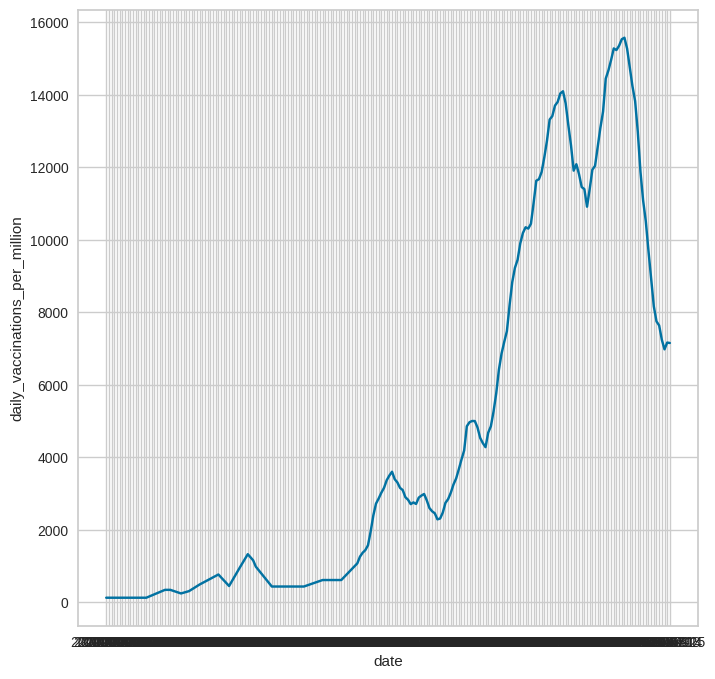

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(data=China1, x='date', y='daily_vaccinations_per_million')
plt.show()

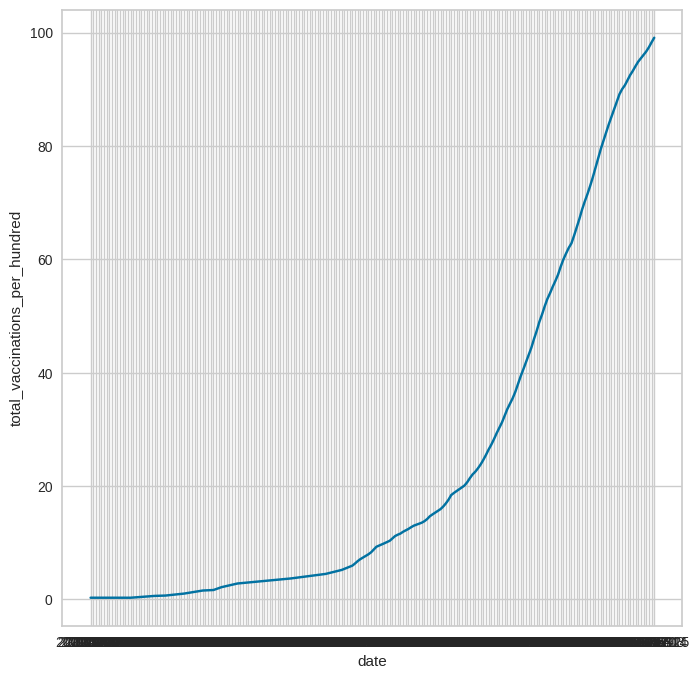

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(data=China1, x='date', y='total_vaccinations_per_hundred')
plt.show()

In [ ]:
China1.describe()

,index,total_vaccinations,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million
count,212.000000,2.120000e+02,2.120000e+02,2.120000e+02,212.000000,212.000000
mean,106.500000,3.380561e+08,7.440231e+06,6.570048e+06,23.494528,4564.627358
std,61.343296,4.279938e+08,6.773302e+06,7.215111e+06,29.729897,5012.877960
min,1.000000,1.687500e+06,2.318000e+06,1.875000e+05,0.310000,130.000000
25%,53.750000,3.702500e+07,2.386000e+06,7.580262e+05,2.576250,526.500000
50%,106.500000,1.232185e+08,3.134500e+06,3.684072e+06,8.560000,2559.500000
75%,159.250000,5.149568e+08,1.241300e+07,1.203286e+07,35.775000,8359.750000
max,212.000000,1.426347e+09,2.474100e+07,2.242429e+07,99.100000,15580.000000


In [ ]:
China1.drop('index', axis=1, inplace=True)

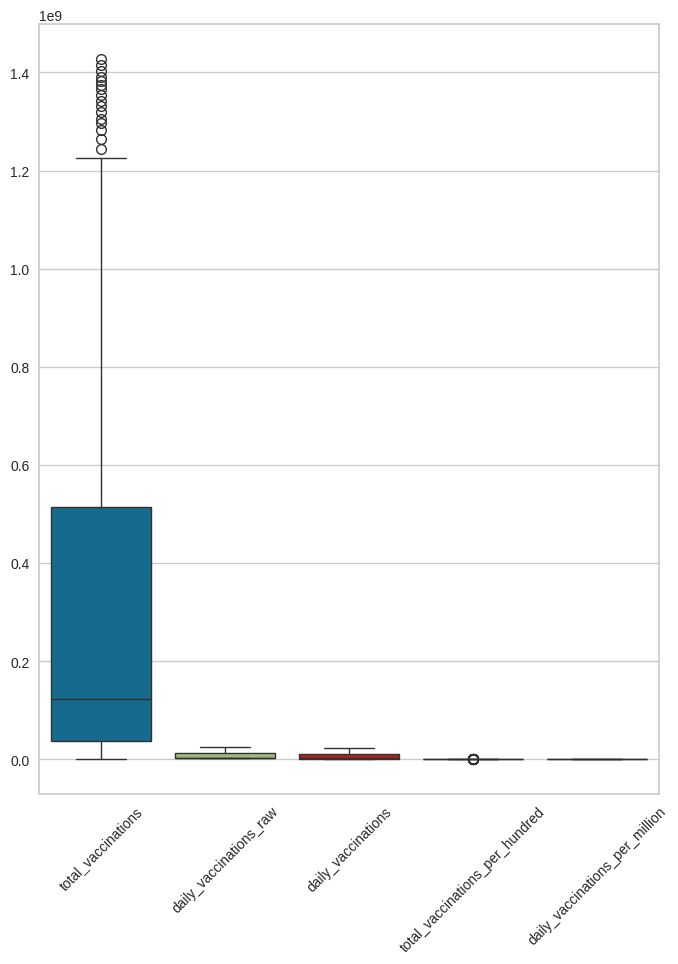

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(data=China1)
plt.xticks(rotation=45)
plt.show()

## Strorytelling - Visualization

## Prepare Data for Machine learning

In [ ]:
China1.head()

,date,total_vaccinations,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,vaccines
0,2020-12-16,1687500.0,2386000.0,187500.0,0.31,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
1,2020-12-17,1875000.0,2386000.0,187500.0,0.31,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
2,2020-12-18,2062500.0,2386000.0,187500.0,0.31,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
3,2020-12-19,2250000.0,2386000.0,187500.0,0.31,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
4,2020-12-20,2437500.0,2386000.0,187500.0,0.31,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."


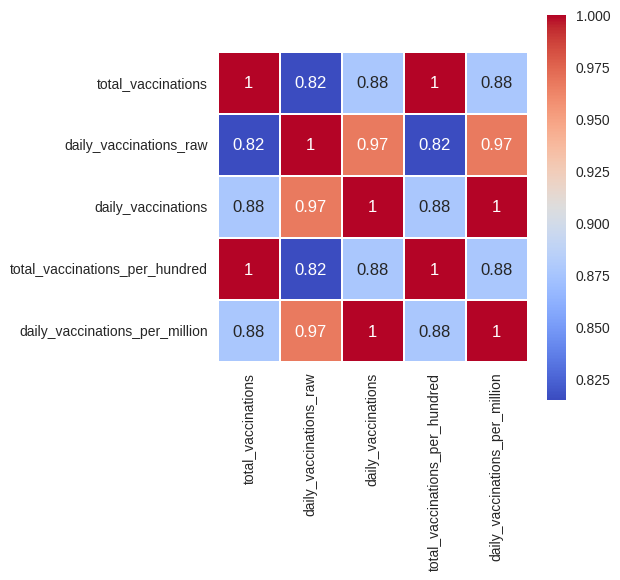

In [ ]:
corr_mat = China1.iloc[:,1:6].corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, linewidths=.2, square=True)
plt.show()

## Train your model

In [ ]:
China1.drop(['date', 'vaccines'], axis=1, inplace=True)
China1.sample()

,total_vaccinations,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million
15,4500000.0,2386000.0,187500.0,0.31,130.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(China1.iloc[:,0:2], China1[['daily_vaccinations']], train_size=.8, random_state=21)

scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train)

scalerGen = StandardScaler()
X_test_scaled = scalerGen.fit_transform(X_test)
y_test_scaled = scalerGen.fit_transform(y_test)

In [ ]:
dict_scaled = {'total_vaccinations':X_train_scaled[:,0], 'daily_vaccinations_raw':X_train_scaled[:,1], 'daily_vaccinations':y_train_scaled[:,0]}
df_scaled = pd.DataFrame(dict_scaled)

## **Pycaret**

In [ ]:
setup(data = df_scaled, target='daily_vaccinations', session_id=21, remove_outliers=True)

,Description,Value
0,Session id,21
1,Target,daily_vaccinations
2,Target type,Regression
3,Original data shape,"(169, 3)"
4,Transformed data shape,"(163, 3)"
5,Transformed train set shape,"(112, 3)"
6,Transformed test set shape,"(51, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0661,0.0124,0.1056,0.9864,0.0525,0.1416,0.2110
et,Extra Trees Regressor,0.0662,0.0146,0.1086,0.9843,0.0538,0.1409,0.2660
rf,Random Forest Regressor,0.0743,0.0181,0.1233,0.9803,0.0603,0.1690,0.5180
catboost,CatBoost Regressor,0.0812,0.0185,0.1246,0.9801,0.0604,0.2095,0.6010
ada,AdaBoost Regressor,0.0961,0.0191,0.1297,0.9785,0.0637,0.1966,0.2160
xgboost,Extreme Gradient Boosting,0.0811,0.0189,0.1310,0.9778,0.0629,0.1659,0.2240
dt,Decision Tree Regressor,0.0898,0.0266,0.1508,0.9707,0.0752,0.2297,0.1620
knn,K Neighbors Regressor,0.1076,0.0384,0.1782,0.9558,0.0865,0.3420,0.1700
lightgbm,Light Gradient Boosting Machine,0.1240,0.0442,0.1913,0.9492,0.0890,0.2232,0.5640
huber,Huber Regressor,0.1379,0.0446,0.1914,0.9490,0.0997,0.4801,0.1700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=21)

## Test the model and show the metrics

In [ ]:
X = df_scaled.drop('daily_vaccinations', axis=1)
y = df_scaled[['daily_vaccinations']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

In [ ]:
catboost = CatBoostRegressor(learning_rate=.2, depth=10)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
mae_catboost = round(mean_absolute_error(y_pred, y_test),4)
print('CatBoostRegressor Mean Absolute Error:', mae_catboost)

0:	learn: 0.8381630	total: 4.46ms	remaining: 4.45s
1:	learn: 0.7189547	total: 9.53ms	remaining: 4.75s
2:	learn: 0.6145582	total: 12.6ms	remaining: 4.19s
3:	learn: 0.5227538	total: 15.9ms	remaining: 3.97s
4:	learn: 0.4459003	total: 20.6ms	remaining: 4.11s
5:	learn: 0.3816952	total: 24.1ms	remaining: 4s
6:	learn: 0.3333716	total: 27.4ms	remaining: 3.88s
7:	learn: 0.2943651	total: 30.7ms	remaining: 3.81s
8:	learn: 0.2591948	total: 34.3ms	remaining: 3.78s
9:	learn: 0.2246976	total: 37.7ms	remaining: 3.73s
10:	learn: 0.2068628	total: 41.3ms	remaining: 3.71s
11:	learn: 0.1895164	total: 44.6ms	remaining: 3.67s
12:	learn: 0.1757153	total: 45.3ms	remaining: 3.44s
13:	learn: 0.1606118	total: 47.2ms	remaining: 3.32s
14:	learn: 0.1465600	total: 49ms	remaining: 3.22s
15:	learn: 0.1370416	total: 52.3ms	remaining: 3.22s
16:	learn: 0.1283438	total: 55.7ms	remaining: 3.22s
17:	learn: 0.1211719	total: 59.1ms	remaining: 3.22s
18:	learn: 0.1156650	total: 62.2ms	remaining: 3.21s
19:	learn: 0.1086796	total:

In [ ]:

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mae_gbr = round(mean_absolute_error(y_pred, y_test),4)
print('GradientBoostingRegressor Mean Absolute Error:', mae_gbr)


GradientBoostingRegressor Mean Absolute Error: 0.0431


In [ ]:
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
mae_etr = round(mean_absolute_error(y_pred, y_test),4)
print('ExtraTreesRegressor Mean Absolute Error:', mae_etr)


ExtraTreesRegressor Mean Absolute Error: 0.0396


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
mae_rfr = round(mean_absolute_error(y_pred, y_test),4)
print('RandomForestRegressor Mean Absolute Error:', mae_rfr)


RandomForestRegressor Mean Absolute Error: 0.0429


In [ ]:
model_names = ['GradientBoostingRegressor', 'ExtraTreesRegressor', 'RandomForestRegressor', 'CatBoostRegerssor']
error = [mae_gbr, mae_etr, mae_rfr, mae_catboost]
MAE_df = pd.DataFrame({'Model':model_names, 'MAE':error}).sort_values(by='MAE', ascending=False)
MAE_df

,Model,MAE
3,CatBoostRegerssor,0.0599
0,GradientBoostingRegressor,0.0431
2,RandomForestRegressor,0.0429
1,ExtraTreesRegressor,0.0396


## Save your final model

In [ ]:
my_model = 'finalized_model.joblib'
joblib.dump(etr, my_model)

['finalized_model.joblib']